In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [29]:
df = pd.read_csv("Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [31]:
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [33]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [34]:
df['Gender'] == "Male"

0       True
1      False
2       True
3      False
4       True
       ...  
370    False
371     True
372    False
373     True
374    False
Name: Gender, Length: 373, dtype: bool

In [35]:
gender_mapping = {"Male": "1","Female": "0"}
df["Gender"] = df['Gender'].map(gender_mapping)
df.head()

/tmp/ipykernel_7389/1730005177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df['Gender'].map(gender_mapping)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0
3,36.0,0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1,Master's,Director,20.0,200000.0


In [36]:
df['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import OrdinalEncoder



In [38]:
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0
3,36.0,0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1,Master's,Director,20.0,200000.0


In [39]:
education_order = [["Bachelor's", "Master's", "PhD"]]
encoder = OrdinalEncoder(categories=education_order)
df['Education_Level_Encoded'] = encoder.fit_transform(
    df[['Education Level']]
).astype(int)

/tmp/ipykernel_7389/1893878200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education_Level_Encoded'] = encoder.fit_transform(


In [41]:
df.drop("Education Level",axis = 1,inplace=True)

/tmp/ipykernel_7389/1423703944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Education Level",axis = 1,inplace=True)


In [42]:
df.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education_Level_Encoded
0,32.0,1,Software Engineer,5.0,90000.0,0
1,28.0,0,Data Analyst,3.0,65000.0,1
2,45.0,1,Senior Manager,15.0,150000.0,2
3,36.0,0,Sales Associate,7.0,60000.0,0
4,52.0,1,Director,20.0,200000.0,1


In [45]:
df['Job Title'].value_counts()

Job Title
Director of Marketing             12
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64

In [46]:
from sklearn.model_selection import KFold

global_mean = df['Salary'].mean()

In [47]:
global_mean

np.float64(100577.34584450402)

In [52]:
df = df.reset_index(drop=True)

In [54]:
df.shape

(373, 7)

In [55]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
df['Job_Title_Encoded'] = np.nan

In [56]:
df.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education_Level_Encoded,Job_Title_Encoded
0,32.0,1,Software Engineer,5.0,90000.0,0,NaN
1,28.0,0,Data Analyst,3.0,65000.0,1,NaN
2,45.0,1,Senior Manager,15.0,150000.0,2,NaN
3,36.0,0,Sales Associate,7.0,60000.0,0,NaN
4,52.0,1,Director,20.0,200000.0,1,NaN


In [57]:
for train_idx,val_idx in kf.split(df):
    train, val = df.iloc[train_idx],df.iloc[val_idx]
    means = train.groupby("Job Title")['Salary'].mean()
    df.loc[val_idx,'Job_Title_Encoded'] = (
        df.loc[val_idx,"Job Title"].map(means).fillna(global_mean)
    )

In [61]:
df['Job_Title_Encoded'].value_counts()

Job_Title_Encoded
100577.345845    118
50000.000000      11
80000.000000       9
150000.000000      8
95000.000000       8
                ... 
48571.428571       1
39166.666667       1
153333.333333      1
48750.000000       1
112222.222222      1
Name: count, Length: 93, dtype: int64

In [72]:
min_count = 2
rare_titles = df["Job Title"].value_counts()
rare_titles = rare_titles[rare_titles < min_count].index

df["Job_Title_Grouped"] = df["Job Title"].replace(rare_titles, "Other")


In [73]:
df.head(50)

,Age,Gender,Job Title,Years of Experience,Salary,Education_Level_Encoded,Job_Title_Encoded,Job_Title_Grouped
0,32.0,1,Software Engineer,5.0,90000.0,0,100577.345845,Other
1,28.0,0,Data Analyst,3.0,65000.0,1,97147.788204,Data Analyst
2,45.0,1,Senior Manager,15.0,150000.0,2,112147.788204,Senior Manager
3,36.0,0,Sales Associate,7.0,60000.0,0,90481.121537,Sales Associate
4,52.0,1,Director,20.0,200000.0,1,100577.345845,Other
5,29.0,1,Marketing Analyst,2.0,55000.0,0,92147.788204,Marketing Analyst
6,42.0,0,Product Manager,12.0,120000.0,1,100577.345845,Product Manager
7,31.0,1,Sales Manager,4.0,80000.0,0,99698.104175,Sales Manager
8,26.0,0,Marketing Coordinator,1.0,45000.0,0,100577.345845,Marketing Coordinator
9,38.0,1,Senior Scientist,10.0,110000.0,2,103814.454870,Senior Scientist


In [74]:
for train_idx,val_idx in kf.split(df):
    train, val = df.iloc[train_idx],df.iloc[val_idx]
    means = train.groupby("Job Title")['Salary'].mean()
    df.loc[val_idx,'Job_Title_Encoded'] = (
        df.loc[val_idx,"Job Title"].map(means).fillna(global_mean)
    )

In [75]:
df.head(50)

,Age,Gender,Job Title,Years of Experience,Salary,Education_Level_Encoded,Job_Title_Encoded,Job_Title_Grouped
0,32.0,1,Software Engineer,5.0,90000.0,0,100577.345845,Other
1,28.0,0,Data Analyst,3.0,65000.0,1,80000.000000,Data Analyst
2,45.0,1,Senior Manager,15.0,150000.0,2,170000.000000,Senior Manager
3,36.0,0,Sales Associate,7.0,60000.0,0,40000.000000,Sales Associate
4,52.0,1,Director,20.0,200000.0,1,100577.345845,Other
5,29.0,1,Marketing Analyst,2.0,55000.0,0,50000.000000,Marketing Analyst
6,42.0,0,Product Manager,12.0,120000.0,1,100577.345845,Product Manager
7,31.0,1,Sales Manager,4.0,80000.0,0,97500.000000,Sales Manager
8,26.0,0,Marketing Coordinator,1.0,45000.0,0,100577.345845,Marketing Coordinator
9,38.0,1,Senior Scientist,10.0,110000.0,2,120000.000000,Senior Scientist


In [78]:
from sklearn.model_selection import KFold
import numpy as np

df = df.reset_index(drop=True)

global_mean = df["Salary"].mean()
df["Job_Title_Encoded"] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha = 5 # smoothing strength

for train_idx, val_idx in kf.split(df):
    train = df.iloc[train_idx]

    stats = train.groupby("Job_Title_Grouped")["Salary"].agg(["mean", "count"])

    smooth = (
        (stats["count"] * stats["mean"] + alpha * global_mean) /
        (stats["count"] + alpha)
    )

    df.loc[val_idx, "Job_Title_Encoded"] = (
        df.loc[val_idx, "Job_Title_Grouped"]
        .map(smooth)
        .fillna(global_mean)
    )


In [80]:
df.drop(columns=['Job Title','Job_Title_Encoded','Job_Title_Grouped'],axis=1,inplace=True)

In [81]:
df.head()

,Age,Gender,Years of Experience,Salary,Education_Level_Encoded
0,32.0,1,5.0,90000.0,0
1,28.0,0,3.0,65000.0,1
2,45.0,1,15.0,150000.0,2
3,36.0,0,7.0,60000.0,0
4,52.0,1,20.0,200000.0,1


In [82]:
y = df["Salary"]
X = df.drop("Salary",axis = 1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [88]:
y_pred_linear = linear_model.predict(X_test)

In [89]:
y_pred_linear

array([171423.80220119,  93084.52581705, 131003.24842349,  83288.58177417,
       161627.85815831, 159291.0133923 , 156564.45800225, 103097.28615824,
        58468.30712711, 100027.41438103, 141819.15377423, 158901.30276825,
        38987.10328923,  88470.57409859, 126794.82317005,  58468.30712711,
        66152.13062278,  49491.83725831,  77311.35236069,  98888.8609048 ,
       129521.3785601 , 107943.87001598, 166474.44201605,  61711.07323005,
        83288.58177417,  49180.66587664, 174158.26551172,  45937.89977369,
       118870.45961461, 149838.38573659,  40125.65676546, 124450.07048356,
        54992.90888487, 152978.37551214,  89609.12757482,  17488.1339875 ,
       183946.30163412,  52888.69625815, 155815.61515007,  60572.51975383,
        44972.2406232 ,  91945.97234082, 170793.55151737, 167215.37694774,
        45937.89977369, 155082.58813886, 124674.79470236,  50543.94357167,
        49413.29801592,  38021.44413873, 156789.18222105,  79415.56498741,
       124690.61054332, 1

In [92]:
mse_linear = mean_squared_error(y_test,y_pred_linear)

In [ ]:
import math 
rmse_linear = math.sqrt(mse_linear)

15739.939469723755

In [96]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_linear)

In [97]:
r2

0.8900993267607982

In [98]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(
    linear_model, X, y,
    cv=5,
    scoring="r2"
)

print("CV R2:", cv_r2)
print("Mean CV R2:", cv_r2.mean())


CV R2: [0.87471827 0.73832877 0.95311826 0.90358662 0.90665096]
Mean CV R2: 0.875280576075814


In [99]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

In [100]:
gbr.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",300
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  ${mae:,.0f}")
print(f"RMSE: ${rmse:,.0f}")
print(f"R2:   {r2:.3f}")

MAE:  $10,815
RMSE: $17,437
R2:   0.865


In [102]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(
    gbr,
    X, y,
    cv=5,
    scoring="r2"
)

print("CV R2 per fold:", cv_r2)
print("Mean CV R2:", cv_r2.mean())

CV R2 per fold: [0.80574725 0.72302409 0.93914873 0.92810156 0.89849528]
Mean CV R2: 0.8589033843749446


In [103]:
import pandas as pd

feature_importance = pd.Series(
    gbr.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance)

Years of Experience        0.583808
Age                        0.360533
Education_Level_Encoded    0.050251
Gender                     0.005408
dtype: float64


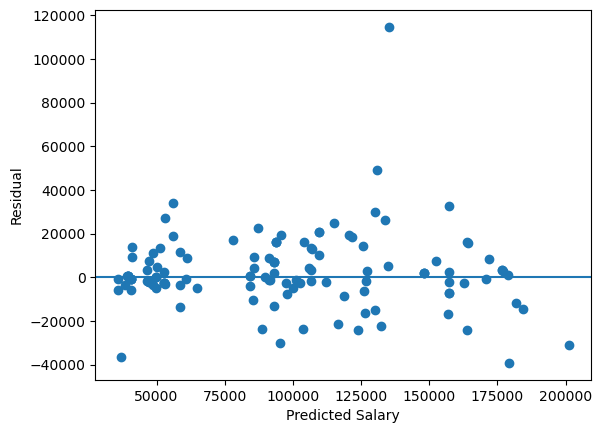

In [104]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Salary")
plt.ylabel("Residual")
plt.show()